In [210]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

# origin = cv2.imread('../datasets/conv_def_img.png')
origin = cv2.imread('../datasets/hand.jpg')
img = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img, (5,5), 0)

In [211]:
rect, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts  = imutils.grab_contours(cnts)
# cnt = cnts[0]
cnt = max(cnts, key=cv2.contourArea)
len(cnt)

821

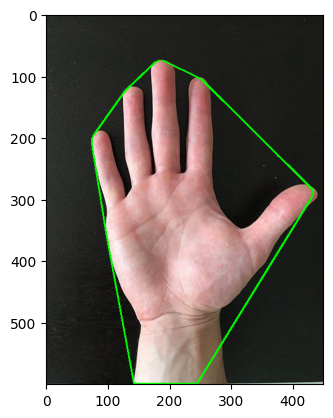

In [212]:

hull_point = cv2.convexHull(cnt, returnPoints=True)
copy = origin.copy()

# draw connection by convex point
for i in range(len(hull_point) - 1):
    cv2.line(copy, tuple(hull_point[i][0]), tuple(hull_point[i+1][0]), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(copy, cv2.COLOR_BGR2RGB))

In [213]:
print('point\n', hull_point)

point
 [[[187  75]]

 [[191  76]]

 [[249 104]]

 [[251 105]]

 [[428 281]]

 [[432 285]]

 [[432 291]]

 [[429 298]]

 [[244 599]]

 [[142 599]]

 [[ 99 366]]

 [[ 97 355]]

 [[ 75 218]]

 [[ 74 210]]

 [[ 74 202]]

 [[ 75 199]]

 [[ 76 197]]

 [[ 78 194]]

 [[127 125]]

 [[131 121]]

 [[176  78]]

 [[180  76]]

 [[183  75]]]


start: (183, 75) end: (180, 76) far: (182, 76)
start: (180, 76) end: (176, 78) far: (179, 77)
start: (176, 78) end: (131, 121) far: (175, 260)
start: (127, 125) end: (78, 194) far: (131, 295)
start: (78, 194) end: (76, 197) far: (78, 195)
start: (76, 197) end: (75, 199) far: (76, 198)
start: (75, 199) end: (74, 202) far: (75, 201)
start: (74, 210) end: (75, 218) far: (75, 211)
start: (75, 218) end: (97, 355) far: (98, 311)
start: (97, 355) end: (99, 366) far: (99, 361)
start: (99, 366) end: (142, 599) far: (154, 504)
start: (244, 599) end: (429, 298) far: (237, 495)
start: (429, 298) end: (432, 291) far: (429, 296)
start: (428, 281) end: (251, 105) far: (267, 317)
start: (251, 105) end: (249, 104) far: (250, 105)
start: (249, 104) end: (191, 76) far: (203, 269)
start: (191, 76) end: (187, 75) far: (188, 76)


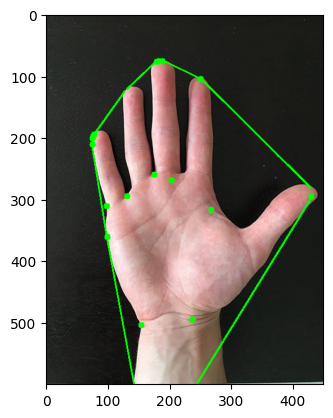

In [214]:
hull = cv2.convexHull(cnt, returnPoints=False)
defects = cv2.convexityDefects(cnt, hull)

copy = origin.copy()
for i in range(defects.shape[0]):
    sidx, eidx, fidx, d = defects[i][0]
    start = tuple(cnt[sidx][0])
    end = tuple(cnt[eidx][0])
    far = tuple(cnt[fidx][0])
    print('start:', start, 'end:', end, 'far:', far)
    
    cv2.line(copy, start, end, [0, 255, 0], 2)
    cv2.circle(copy, far, 5, [0, 255, 0], -1)
    
plt.imshow(cv2.cvtColor(copy, cv2.COLOR_BGR2RGB))

In [215]:
print('hull:\n', hull)
print('defects:\n', defects)

hull:
 [[820]
 [818]
 [714]
 [712]
 [561]
 [560]
 [559]
 [553]
 [394]
 [393]
 [271]
 [267]
 [215]
 [213]
 [212]
 [210]
 [208]
 [206]
 [103]
 [102]
 [  6]
 [  2]
 [  0]]
defects:
 [[[    0     2     1   162]]

 [[    2     6     3   114]]

 [[    6   102    37 33509]]

 [[  103   206   146 26033]]

 [[  206   208   207   142]]

 [[  208   210   209   114]]

 [[  210   212   211   162]]

 [[  213   215   214   222]]

 [[  215   267   260  2039]]

 [[  267   271   270   229]]

 [[  271   393   368  7435]]

 [[  394   553   429 15468]]

 [[  553   559   554   202]]

 [[  561   712   650 35597]]

 [[  712   714   713   114]]

 [[  714   818   759 43159]]

 [[  818   820   819   186]]]
